# THE SPARKS FOUNDATION

# Prediction-using-Supervised-ML

TASK 1 - Predict the percentage of an student based on the number of hours they studied

# Author - Khadim SENE

# **Simple Linear Regression**

In this section we will implement a simple linear regression algorithm as it involves just two variables. We will be predicting the percentage that a student is expected to score based upon the number of hours they studied.

In [1]:
# The first step is to import the libraries that are required for the implementation of the code operation.  

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# The next phase is to load the data into the program to perform the desired operation.
# Here we use the pandas to load the student_scores csv file.

# Loading and showing the dataset
dataset = pd.read_csv("http://bit.ly/w-data")

# Data Exploration
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things :
- head of the dataset
- the shape of the dataset
- info of the dataset
- summary of the dataset

In [3]:
# head of the dataset
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# The shape of the dataset
dataset.shape

(25, 2)

**The student_scores dataset has 25 observations and 2 variables in the data set**.

In [5]:
# Let's check the Information about the data and the datatypes of each respective attribute.
# Info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Looking at the data in the head function and in info, we see that the variable Hours is of float data type and the the variable scores is of int data type**.

In [6]:
# summary of the dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The described method help us to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [7]:
# Checking the missing values in the data set
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There is no null value in the Dataset so, we can now visualize our Data**.

The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

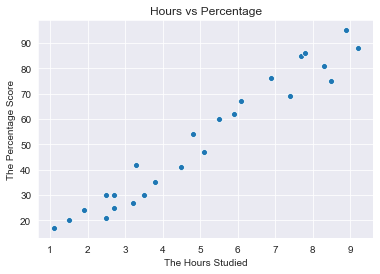

In [8]:
sns.set_style('darkgrid')
sns.scatterplot(y= dataset['Scores'], x= dataset['Hours'])    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show() 

**From the above scatterplot, we can see that there is a positive linear relationship between the number of hours studied and percentage of score, Lets plot a regression line to confirm the correlation**.

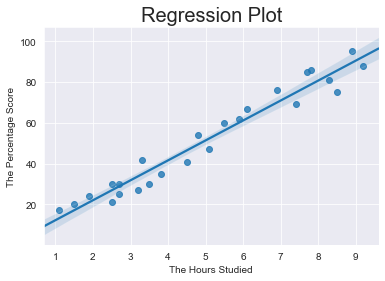

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
sns.regplot(x= dataset['Hours'], y= dataset['Scores'])
plt.title('Regression Plot',size=20)
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')
plt.show() 
print(dataset.corr())

**It is confirmed that the variables are positively correlated**.

# Training the Model

### Splitting the Data

In [10]:
# Lets divide the data into "attributes" (inputs) and "labels" (outputs)

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values 

In [11]:
# The next step is to split this data into training and test sets.
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Fitting the Data into the model

In [12]:
# Traing our algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Making Predictions

After training our algorithm, we are going to make some predictions.

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Predicting the Percentage of Score

In [14]:
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Scores': [k for k in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### Comparing the actual scores with the Predicted scores

In [15]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
# Lets test with our own data
hours = [9.25]
my_pred = regressor.predict([hours])
print("Number of Hours = {}".format(hours))
print(" Predicted Score = {}".format(round(my_pred[0],3)))

Number of Hours = [9.25]
 Predicted Score = 93.692


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69**.

# ------------------- End of Code --------------------